In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
#importing all the required libraries to find best Algorithm
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3)]
for m in model:
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
        m.fit(x_train,y_train)
        predrf = m.predict(x_test)
        acc = accuracy_score(y_test, predrf)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
    
    print("Best accuracy is",maxAccu," on Random_state ",maxRS, "for model ", m)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
        
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

Best accuracy is 0.9506172839506173  on Random_state  47 for model  LogisticRegression()
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.9506172839506173
[[57  1]
 [ 3 20]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.95      0.87      0.91        23

    accuracy                           0.95        81
   macro avg       0.95      0.93      0.94        81
weighted avg       0.95      0.95      0.95        81

[0.72222222 0.85185185 0.96296296 0.85185185 0.94339623]
0.8664570230607966
Difference between Accuracy score and cross validatio score is -  0.08416026088982065
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
Best accuracy is 0.901

Decision Tree Classifier have Good F1-Score i.e. 100%. Cross Validation Score is also good.
Hence we will use Decision Tree Classifier to train our model

Hyperemeter tuning is not required. Becuase model already learnt 100%.

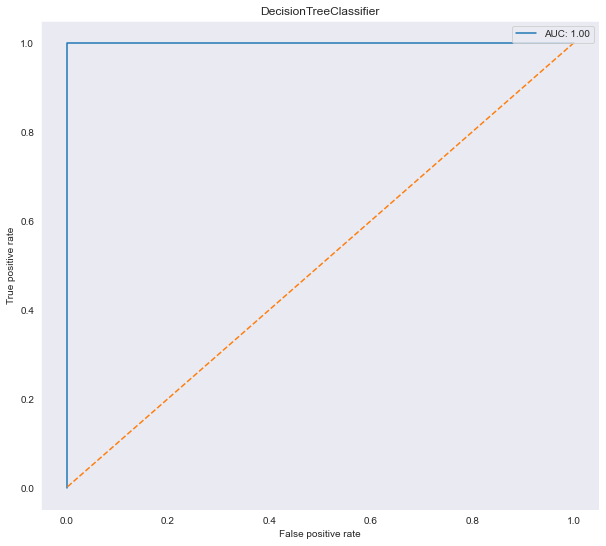

In [32]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,preddtc) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid